<a href="https://colab.research.google.com/github/SANSKARJ14/customer_segmentation-/blob/main/RFM_ANALYSIS_CUSTOMER_SEGMENTATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime


In [ ]:
df = pd.read_excel('/content/online_retail_II.xlsx')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom


In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [ ]:

# Project Goals:

# - Perform RFM (Recency, Frequency, Monetary) analysis
# - Use K-means clustering to segment customers
# - Visualize customer segments
# - Develop targeted marketing strategies for each segment

# Skills: Data cleaning, feature engineering, clustering, data visualization

In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.000000,525461,525461.000000,417534.000000
mean,10.337667,2010-06-28 11:37:36.845017856,4.688834,15360.645478
min,-9600.000000,2009-12-01 07:45:00,-53594.360000,12346.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,13983.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,15311.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16799.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000
std,107.424110,NaN,146.126914,1680.811316


In [ ]:
"""
information from df.decscibe()
1. negative values in price and quantity, in quantity it is because of return.
2.negative values in Price are due to discounts or promotional offers.
3.Outliers in Quantity
4.Missing Values in Customer ID
5.Inconsistencies in InvoiceDate
"""

'\ninformation from df.decscibe()\n1. negative values in price and quantity, in quantity it is because of return.\n2.negative values in Price are due to discounts or promotional offers.\n3.Outliers in Quantity\n4.Missing Values in Customer ID\n5.Inconsistencies in InvoiceDate\n'

In [ ]:
negative_quantity = df[df['Quantity'] < 0]

In [ ]:
negative_quantity.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,12326.000000,12326,12326.000000,9839.000000
mean,-47.018254,2010-06-11 15:48:17.966899200,34.470647,15035.010367
min,-9600.000000,2009-12-01 10:33:00,0.000000,12346.000000
25%,-12.000000,2010-03-03 12:09:00,0.850000,13576.000000
50%,-2.000000,2010-06-04 09:37:00,2.550000,14911.000000
75%,-1.000000,2010-09-28 17:30:00,5.950000,16454.000000
max,-1.000000,2010-12-09 17:32:00,25111.090000,18287.000000
std,358.787486,NaN,477.314738,1690.634907


In [ ]:
df['Quantity'] = df['Quantity'].astype(int)

In [ ]:
df['Return'] = df.Quantity.apply(lambda x:1 if x < 0 else 0 )

In [ ]:
df['adjusted_quantity'] = df['Quantity'].abs()
"""
Adjusted Quantity: This is typically used to represent the absolute value of the quantity sold,
regardless of whether it's a sale or a return. It helps in understanding the volume of transactions without considering the direction
(positive or negative).

Net Sales Calculation: When calculating net sales, we want to account for both sales and returns.
The formula should reflect the actual revenue generated, taking into account the returns.
"""

"\nAdjusted Quantity: This is typically used to represent the absolute value of the quantity sold,\nregardless of whether it's a sale or a return. It helps in understanding the volume of transactions without considering the direction\n(positive or negative).\n\nNet Sales Calculation: When calculating net sales, we want to account for both sales and returns.\nThe formula should reflect the actual revenue generated, taking into account the returns.\n"

In [ ]:
df['Net_sales'] = df['Price'] * df['Quantity']

In [ ]:
total_net_sales = df['Net_sales'].sum()

In [ ]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [ ]:
df.dtypes

Invoice                      object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
Price                       float64
Customer ID                 float64
Country                      object
Return                        int64
adjusted_quantity             int64
Net_sales                   float64
dtype: object

In [ ]:
sales_data = df[df['Quantity'] >= 0]

In [ ]:
sales_data

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,48,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24,30.00
...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0,2,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,2,7.50


In [ ]:
total_net_sales

9539484.634

In [ ]:
"""
 detailed analysis of price
1.zero_values
2.negative_values
3.outlier_detection
"""

'\n detailed analysis of price\n1. zero_values\n2.negative_values\n3.outlier_detection\n'

In [ ]:
price_zero = df[df['Price'] == 0]
price_zero

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.0,NaN,United Kingdom,1,96,-0.0
283,489463,71477,short,-240,2009-12-01 10:52:00,0.0,NaN,United Kingdom,1,240,-0.0
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.0,NaN,United Kingdom,1,192,-0.0
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.0,NaN,United Kingdom,1,50,-0.0
3114,489655,20683,NaN,-44,2009-12-01 17:26:00,0.0,NaN,United Kingdom,1,44,-0.0
...,...,...,...,...,...,...,...,...,...,...,...
525231,538159,21324,NaN,-18,2010-12-09 17:17:00,0.0,NaN,United Kingdom,1,18,-0.0
525232,538158,20892,NaN,-32,2010-12-09 17:17:00,0.0,NaN,United Kingdom,1,32,-0.0
525233,538160,20956,NaN,288,2010-12-09 17:18:00,0.0,NaN,United Kingdom,0,288,0.0
525234,538161,46000S,Dotcom sales,-100,2010-12-09 17:25:00,0.0,NaN,United Kingdom,1,100,-0.0


In [ ]:
negative_prices = df['Price'] < 0
negative_prices

0         False
1         False
2         False
3         False
4         False
          ...  
525456    False
525457    False
525458    False
525459    False
525460    False
Name: Price, Length: 525461, dtype: bool

In [ ]:
df.drop(df[negative_prices].index, inplace=True)
# we droped 3 rows with negative values because it that price is below zero and they are highly skewed.

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,48,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24,30.0


In [ ]:
#handling missing values
df.isnull().sum()

Invoice                   0
StockCode                 0
Description            2928
Quantity                  0
InvoiceDate               0
Price                     0
Customer ID          107924
Country                   0
Return                    0
adjusted_quantity         0
Net_sales                 0
dtype: int64

In [ ]:
#The missing values are random and do not correlate
most_frequent_description = df['Description'].mode()[0]
df['Description'] = df['Description'].fillna(most_frequent_description)

In [ ]:
df['Missing_Customer_ID'] = df['Customer ID'].isnull().astype(int)

In [ ]:
missing_by_month = df.groupby(df['InvoiceDate'].dt.to_period('M'))['Missing_Customer_ID'].sum()
print(missing_by_month)

InvoiceDate
2009-12    13468
2010-01     9116
2010-02     5482
2010-03     8397
2010-04     6223
2010-05     5719
2010-06     8033
2010-07     5636
2010-08     6364
2010-09     6705
2010-10     8536
2010-11    16525
2010-12     7720
Freq: M, Name: Missing_Customer_ID, dtype: int64


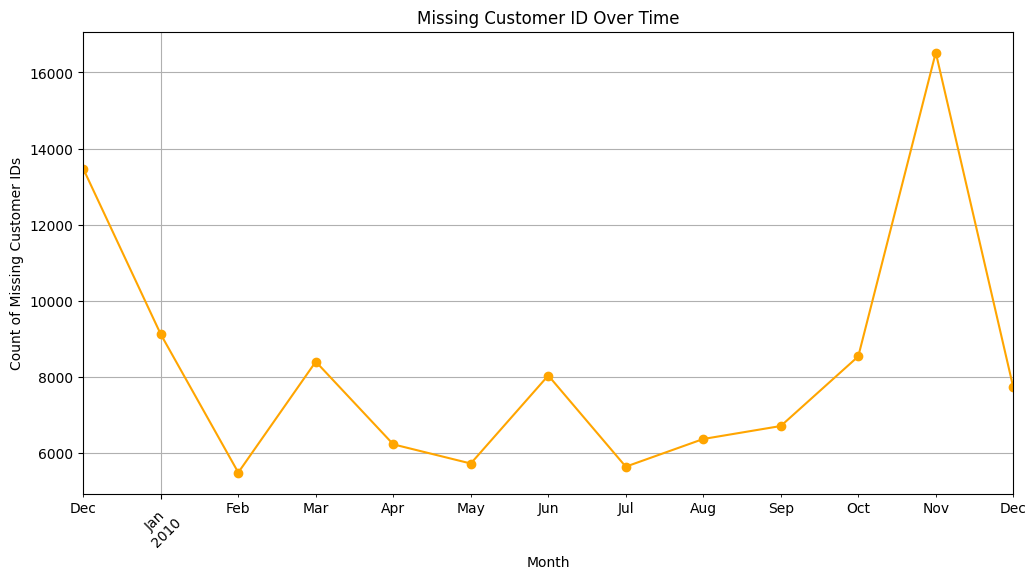

In [ ]:
plt.figure(figsize=(12, 6))
missing_by_month.plot(kind='line', marker='o', color='orange')
plt.title('Missing Customer ID Over Time')
plt.xlabel('Month')
plt.ylabel('Count of Missing Customer IDs')
plt.grid()
plt.xticks(rotation=45)
plt.show()
#no pattern found

In [ ]:
missing_by_product = df.groupby('StockCode')['Missing_Customer_ID'].sum()
print(missing_by_product.sort_values(ascending=False).head(10))

StockCode
DOT       736
22423     349
21212     334
47566     313
21232     307
85099B    273
22355     271
85123A    271
20724     265
22197     245
Name: Missing_Customer_ID, dtype: int64


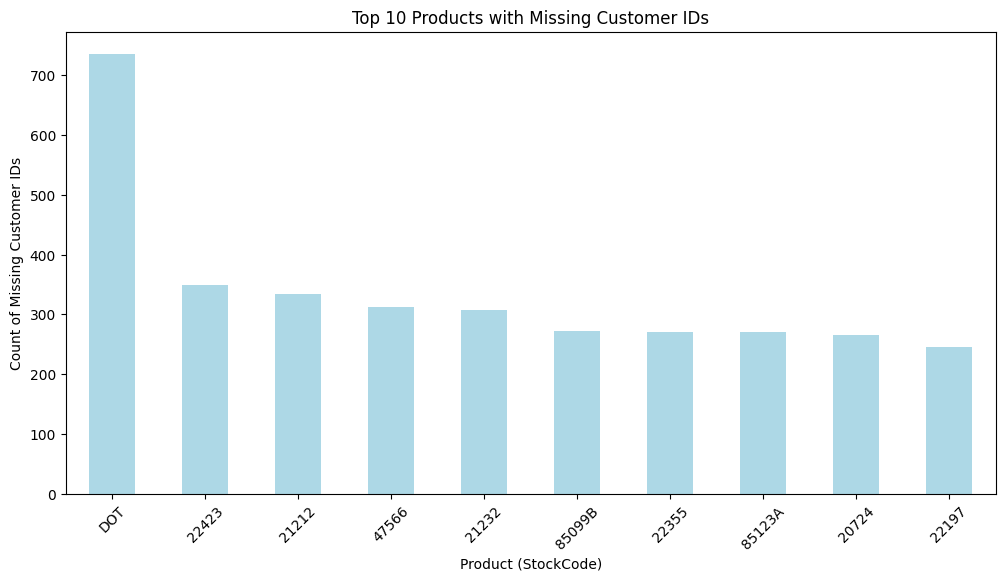

In [ ]:
plt.figure(figsize=(12, 6))
missing_by_product.sort_values(ascending=False).head(10).plot(kind='bar', color='lightblue')
plt.title('Top 10 Products with Missing Customer IDs')
plt.xlabel('Product (StockCode)')
plt.ylabel('Count of Missing Customer IDs')
plt.xticks(rotation=45)
plt.show()

In [ ]:
#filling entries of Customer ID of -1 distinguishing guest purchases. This can be useful for understanding the impact of missing data on your analysis.
df['Customer ID'] = df['Customer ID'].fillna(-1)

In [ ]:
df.isnull().sum()

Invoice                0
StockCode              0
Description            0
Quantity               0
InvoiceDate            0
Price                  0
Customer ID            0
Country                0
Return                 0
adjusted_quantity      0
Net_sales              0
Missing_Customer_ID    0
dtype: int64

In [ ]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
count,525458.000000,525458,525458.000000,525458.000000,525458.000000,525458.000000,525458.000000,525458.000000
mean,10.337721,2010-06-28 11:37:24.497943040,4.948734,12205.511811,0.023458,12.543594,18.414482,0.205390
min,-9600.000000,2009-12-01 07:45:00,0.000000,-1.000000,0.000000,1.000000,-25111.090000,0.000000
25%,1.000000,2010-03-21 12:20:00,1.250000,12748.000000,0.000000,1.000000,3.750000,0.000000
50%,3.000000,2010-07-06 09:51:00,2.100000,14606.000000,0.000000,3.000000,9.950000,0.000000
75%,10.000000,2010-10-15 12:45:00,4.210000,16456.000000,0.000000,11.000000,17.700000,0.000000
max,19152.000000,2010-12-09 20:01:00,25111.090000,18287.000000,1.000000,19152.000000,25111.090000,1.000000
std,107.424415,NaN,96.493161,6384.208761,0.151352,107.189232,116.865637,0.403987


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12,83.4,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.0,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.0,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,48,100.8,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24,30.0,0


In [ ]:
duplicates = df.duplicated()

In [ ]:
duplicates.value_counts()

False    518593
True       6865
Name: count, dtype: int64

In [ ]:
df.drop_duplicates()
#Droping the duplicate rows

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.00,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12,81.00,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,48,100.80,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24,30.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0,2,5.90,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1,3.75,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1,3.75,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,2,7.50,0


In [ ]:
invoice_duplicates = df[df.duplicated(subset=['Invoice', 'StockCode', 'Quantity'], keep=False)]
print("Sample of potential duplicate invoices:")
invoice_duplicates.head()
#these are multiple purchases no need to delete it

Sample of potential duplicate invoices:


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
362,489517,21913,VINTAGE SEASIDE JIGSAW PUZZLES,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,0,1,3.75,0
363,489517,21912,VINTAGE SNAKES & LADDERS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,0,1,3.75,0
365,489517,21821,GLITTER STAR GARLAND WITH BELLS,1,2009-12-01 11:34:00,3.75,16329.0,United Kingdom,0,1,3.75,0
367,489517,22319,HAIRCLIPS FORTIES FABRIC ASSORTED,12,2009-12-01 11:34:00,0.65,16329.0,United Kingdom,0,12,7.80,0
368,489517,22130,PARTY CONE CHRISTMAS DECORATION,6,2009-12-01 11:34:00,0.85,16329.0,United Kingdom,0,6,5.10,0


In [ ]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [ ]:
# Detect outliers in Quantity and Price
quantity_outliers = detect_outliers(df, 'adjusted_quantity')
price_outliers = detect_outliers(df, 'Price')

In [ ]:
quantity_outliers.sort_values(by="adjusted_quantity")

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
239997,512589,22216,T-LIGHT HOLDER WHITE LACE,27,2010-06-16 16:04:00,1.66,-1.0,United Kingdom,0,27,44.82,1
100607,498901,18007,ESSENTIAL BALM 3.5g TIN IN ENVELOPE,27,2010-02-23 14:12:00,0.18,15311.0,United Kingdom,0,27,4.86,0
442766,531516,22571,ROCKING HORSE RED CHRISTMAS,27,2010-11-08 16:45:00,1.95,-1.0,United Kingdom,0,27,52.65,1
429805,530422,84568,GIRLS ALPHABET IRON ON PATCHES,27,2010-11-03 09:36:00,0.43,-1.0,United Kingdom,0,27,11.61,1
304754,519177,22460,EMBOSSED GLASS TEALIGHT HOLDER,27,2010-08-13 14:40:00,1.25,17589.0,United Kingdom,0,27,33.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127167,501534,21092,SET/6 STRAWBERRY PAPER PLATES,12480,2010-03-17 13:09:00,0.10,13902.0,Denmark,0,12480,1248.00,0
127169,501534,21085,SET/6 WOODLAND PAPER CUPS,12744,2010-03-17 13:09:00,0.10,13902.0,Denmark,0,12744,1274.40,0
127168,501534,21091,SET/6 WOODLAND PAPER PLATES,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,0,12960,1296.00,0
127166,501534,21099,SET/6 STRAWBERRY PAPER CUPS,12960,2010-03-17 13:09:00,0.10,13902.0,Denmark,0,12960,1296.00,0


In [ ]:
price_outliers.sort_values(by='Price')

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
40526,492782,21595,Dad's Cab Electronic Meter,1,2009-12-18 17:06:00,8.65,-1.0,United Kingdom,0,1,8.65,1
22541,491155,21218,RED SPOTTY BISCUIT TIN,1,2009-12-10 09:49:00,8.65,-1.0,United Kingdom,0,1,8.65,1
22572,491155,21595,Dad's Cab Electronic Meter,1,2009-12-10 09:49:00,8.65,-1.0,United Kingdom,0,1,8.65,1
5778,489857,21700,BIG DOUGHNUT FRIDGE MAGNETS,1,2009-12-02 14:43:00,8.65,-1.0,United Kingdom,0,1,8.65,1
22573,491155,84711B,PINK OVAL SHAPE TRINKET BOX,1,2009-12-10 09:49:00,8.65,-1.0,United Kingdom,0,1,8.65,1
...,...,...,...,...,...,...,...,...,...,...,...,...
517955,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,-1.0,United Kingdom,0,1,13541.33,1
519294,C537651,AMAZONFEE,AMAZON FEE,-1,2010-12-07 15:49:00,13541.33,-1.0,United Kingdom,1,1,-13541.33,1
320581,C520667,BANK CHARGES,Bank Charges,-1,2010-08-27 13:42:00,18910.69,-1.0,United Kingdom,1,1,-18910.69,1
241827,512771,M,Manual,1,2010-06-17 16:53:00,25111.09,-1.0,United Kingdom,0,1,25111.09,1


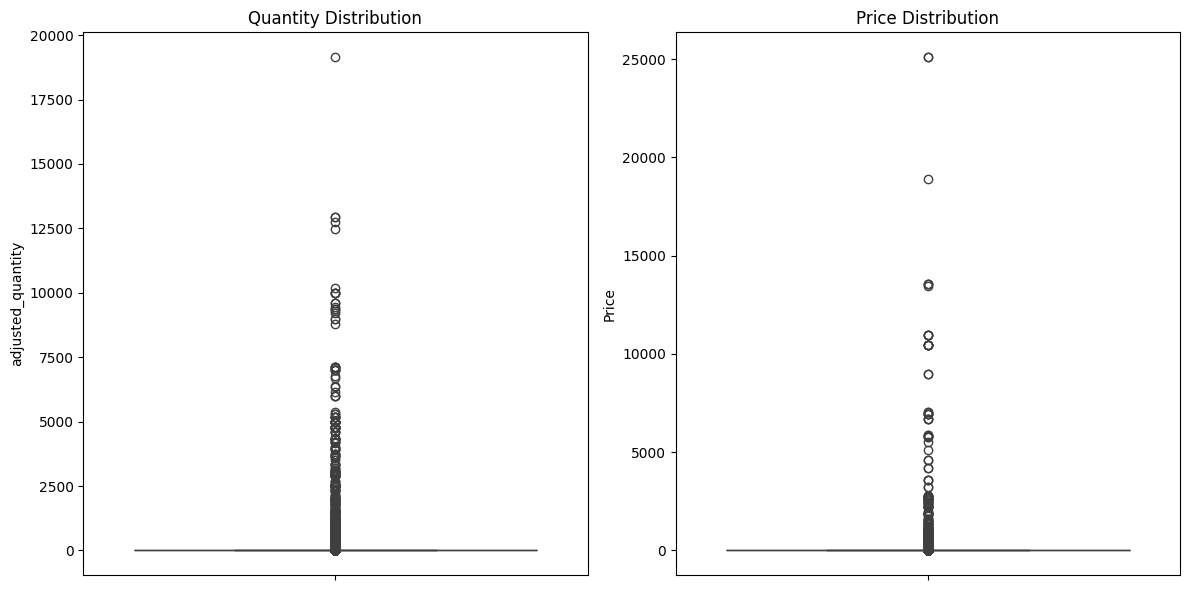

In [ ]:
# Visualize outliers
plt.figure(figsize=(12, 6))
plt.subplot(121)
sns.boxplot(y=df['adjusted_quantity'])
plt.title('Quantity Distribution')
plt.subplot(122)
sns.boxplot(y=df['Price'])
plt.title('Price Distribution')
plt.tight_layout()
plt.show()

In [ ]:
#now our aim find the customer behaviour of majority of data.outlier may dishort the analysis so we cap them.
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

In [ ]:
df = cap_outliers(df, 'adjusted_quantity')

In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12.0,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12.0,81.00,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12.0,81.00,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,26.0,100.80,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24.0,30.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0,2.0,5.90,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1.0,3.75,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1.0,3.75,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,2.0,7.50,0


In [ ]:
df = cap_outliers(df, 'Price')


In [ ]:
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Return,adjusted_quantity,Net_sales,Missing_Customer_ID
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,0,12.0,83.40,0
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12.0,81.00,0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,0,12.0,81.00,0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0,26.0,100.80,0
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0,24.0,30.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.0,United Kingdom,0,2.0,5.90,0
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1.0,3.75,0
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,1.0,3.75,0
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.0,United Kingdom,0,2.0,7.50,0


In [ ]:
#FEATURE ENGINNERING CREATING RMF FEATURES

In [ ]:
# Set the analysis date as the day after the last invoice date
analysis_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)


In [ ]:
rfm = df.groupby('Customer ID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,  # Recency
    'Invoice': 'count',  # Frequency
    'Price': lambda x: (x * df.loc[x.index, 'adjusted_quantity']).sum()  # Monetary
})
"""
Recency: The number of days since a customer's last purchase, calculated as analysis_date - last_purchase_date.
Frequency: The number of purchases a customer has made up to the analysis_date.
Monetary Value: The total amount spent by a customer up to the analysis_date
"""

In [ ]:
rfm.columns = ['Recency', 'Frequency', 'Monetary']

In [ ]:
rfm


,Recency,Frequency,Monetary
Customer ID,,,
-1.0,1,107924,883069.82
12346.0,67,46,501.80
12347.0,3,71,1299.52
12348.0,74,20,222.16
12349.0,43,107,2070.29
...,...,...,...
18283.0,18,230,631.17
18284.0,65,29,380.88
18285.0,296,12,235.35


In [ ]:
# Average Order Value
rfm['AOV'] = rfm['Monetary'] / rfm['Frequency']

In [ ]:
first_purchase = df.groupby('Customer ID')['InvoiceDate'].min()
rfm['Days_Since_First_Purchase'] = (analysis_date - first_purchase).dt.days

In [ ]:
def purchase_regularity(customer_invoices):
    if len(customer_invoices) < 2:
        return 0
    return np.std(np.diff(sorted(customer_invoices)))

In [ ]:
def purchase_regularity(customer_invoices):
    if len(customer_invoices) < 2:
        return 0

    # Convert the sorted invoice dates to a list of datetime objects
    invoice_dates = pd.to_datetime(sorted(customer_invoices)).tolist()

    # Calculate the differences between consecutive invoice dates
    date_diffs = [(date2 - date1).days for date1, date2 in zip(invoice_dates[:-1], invoice_dates[1:])]

    # Calculate the standard deviation of the date differences
    return np.std(date_diffs)

In [ ]:
regularity = df.groupby('Customer ID')['InvoiceDate'].apply(purchase_regularity)

In [ ]:
# Favorite Product Category
def favorite_category(customer_purchases):
    return customer_purchases['StockCode'].value_counts().index[0]

,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity
Customer ID,,,,,,
-1.0,1,107924,883069.82,8.182330,374,0.049358
12346.0,67,46,501.80,10.908696,361,22.456279
12347.0,3,71,1299.52,18.303099,40,4.390644
12348.0,74,20,222.16,11.108000,74,0.000000
12349.0,43,107,2070.29,19.348505,371,21.030390
...,...,...,...,...,...,...
18283.0,18,230,631.17,2.744217,294,11.421566
18284.0,65,29,380.88,13.133793,67,0.371154
18285.0,296,12,235.35,19.612500,296,0.000000


In [ ]:
def favorite_category(customer_purchases):
    return customer_purchases['StockCode'].value_counts().index[0]

In [ ]:
favorite_categories = df.groupby('Customer ID').apply(favorite_category)

In [ ]:
rfm['Favorite_Category'] = favorite_categories

In [ ]:
rfm

,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Favorite_Category
Customer ID,,,,,,,
-1.0,1,107924,883069.82,8.182330,374,0.049358,DOT
12346.0,67,46,501.80,10.908696,361,22.456279,M
12347.0,3,71,1299.52,18.303099,40,4.390644,84558A
12348.0,74,20,222.16,11.108000,74,0.000000,21213
12349.0,43,107,2070.29,19.348505,371,21.030390,22072
...,...,...,...,...,...,...,...
18283.0,18,230,631.17,2.744217,294,11.421566,20727
18284.0,65,29,380.88,13.133793,67,0.371154,C2
18285.0,296,12,235.35,19.612500,296,0.000000,21752


In [ ]:
#feature scaling
from sklearn.preprocessing import StandardScaler

In [ ]:
features_to_scale = ['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']

In [ ]:
scaler = StandardScaler()

In [ ]:
rfm_scaled = rfm.copy()
rfm_scaled[features_to_scale] = scaler.fit_transform(rfm[features_to_scale])


In [ ]:
rfm_scaled.head()

,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Favorite_Category
Customer ID,,,,,,,
-1.0,-0.920652,65.686455,63.791882,-0.667419,1.215828,-0.737660,DOT
12346.0,-0.248305,-0.045003,-0.082857,-0.486195,1.107090,0.760341,M
12347.0,-0.900278,-0.029770,-0.025123,0.005317,-1.577913,-0.447426,84558A
12348.0,-0.176996,-0.060845,-0.103096,-0.472947,-1.293521,-0.740960,21213
12349.0,-0.492795,-0.007835,0.030661,0.074806,1.190735,0.665014,22072


In [ ]:
# One-hot encode the Favorite_Category
rfm_encoded = pd.get_dummies(rfm_scaled, columns=['Favorite_Category'], prefix='Cat')

In [ ]:
rfm_encoded

,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Cat_10002,Cat_10133,Cat_10134,Cat_10135,...,Cat_90200A,Cat_ADJUST,Cat_BANK CHARGES,Cat_C2,Cat_D,Cat_DOT,Cat_M,Cat_PADS,Cat_POST,Cat_TEST001
Customer ID,,,,,,,,,,,,,,,,,,,,,
-1.0,-0.920652,65.686455,63.791882,-0.667419,1.215828,-0.737660,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
12346.0,-0.248305,-0.045003,-0.082857,-0.486195,1.107090,0.760341,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
12347.0,-0.900278,-0.029770,-0.025123,0.005317,-1.577913,-0.447426,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12348.0,-0.176996,-0.060845,-0.103096,-0.472947,-1.293521,-0.740960,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
12349.0,-0.492795,-0.007835,0.030661,0.074806,1.190735,0.665014,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18283.0,-0.747472,0.067111,-0.073494,-1.028895,0.546669,0.022622,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18284.0,-0.268679,-0.055361,-0.091608,-0.338291,-1.352072,-0.716147,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
18285.0,2.084535,-0.065719,-0.102141,0.092354,0.563398,-0.740960,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Drop any remaining null values
rfm_final = rfm_encoded.dropna()

In [ ]:
# Reset index to make Customer ID a column
rfm_final = rfm_final.reset_index()

In [ ]:
# Save the prepared dataset
rfm_final.to_csv('rfm_prepared.csv', index=False)


In [ ]:
print("Data cleaning and feature engineering complete. Final dataset shape:", rfm_final.shape)


Data cleaning and feature engineering complete. Final dataset shape: (4384, 1368)


In [ ]:
#Comprehensive RFM Analysis, Clustering, and Visualization

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [ ]:
# Set styling for matplotlib
plt.style.use('seaborn')
sns.set_palette("deep")

# Load the prepared data
rfm_df = pd.read_csv('rfm_prepared.csv')

<ipython-input-147-46bfc6655be4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [ ]:
#we remove the customer which are unregistred without_id
rfm_df = rfm_df.drop(index=0).reset_index(drop=True)

In [ ]:
rfm_df

,Customer ID,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Cat_10002,Cat_10133,Cat_10134,...,Cat_90200A,Cat_ADJUST,Cat_BANK CHARGES,Cat_C2,Cat_D,Cat_DOT,Cat_M,Cat_PADS,Cat_POST,Cat_TEST001
0,12347.0,-0.900278,-0.029770,-0.025123,0.005317,-1.577913,-0.447426,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,12348.0,-0.176996,-0.060845,-0.103096,-0.472947,-1.293521,-0.740960,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,12349.0,-0.492795,-0.007835,0.030661,0.074806,1.190735,0.665014,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12351.0,-0.818782,-0.060236,-0.097691,-0.271756,-1.820484,-0.740960,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12352.0,-0.818782,-0.062063,-0.094589,0.043147,-1.678287,-0.489273,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,18283.0,-0.747472,0.067111,-0.073494,-1.028895,0.546669,0.022622,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4378,18284.0,-0.268679,-0.055361,-0.091608,-0.338291,-1.352072,-0.716147,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4379,18285.0,2.084535,-0.065719,-0.102141,0.092354,0.563398,-0.740960,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,18286.0,0.210113,-0.030379,-0.026371,0.006327,1.090361,0.835340,False,False,False,...,False,False,False,False,False,False,False,False,False,False


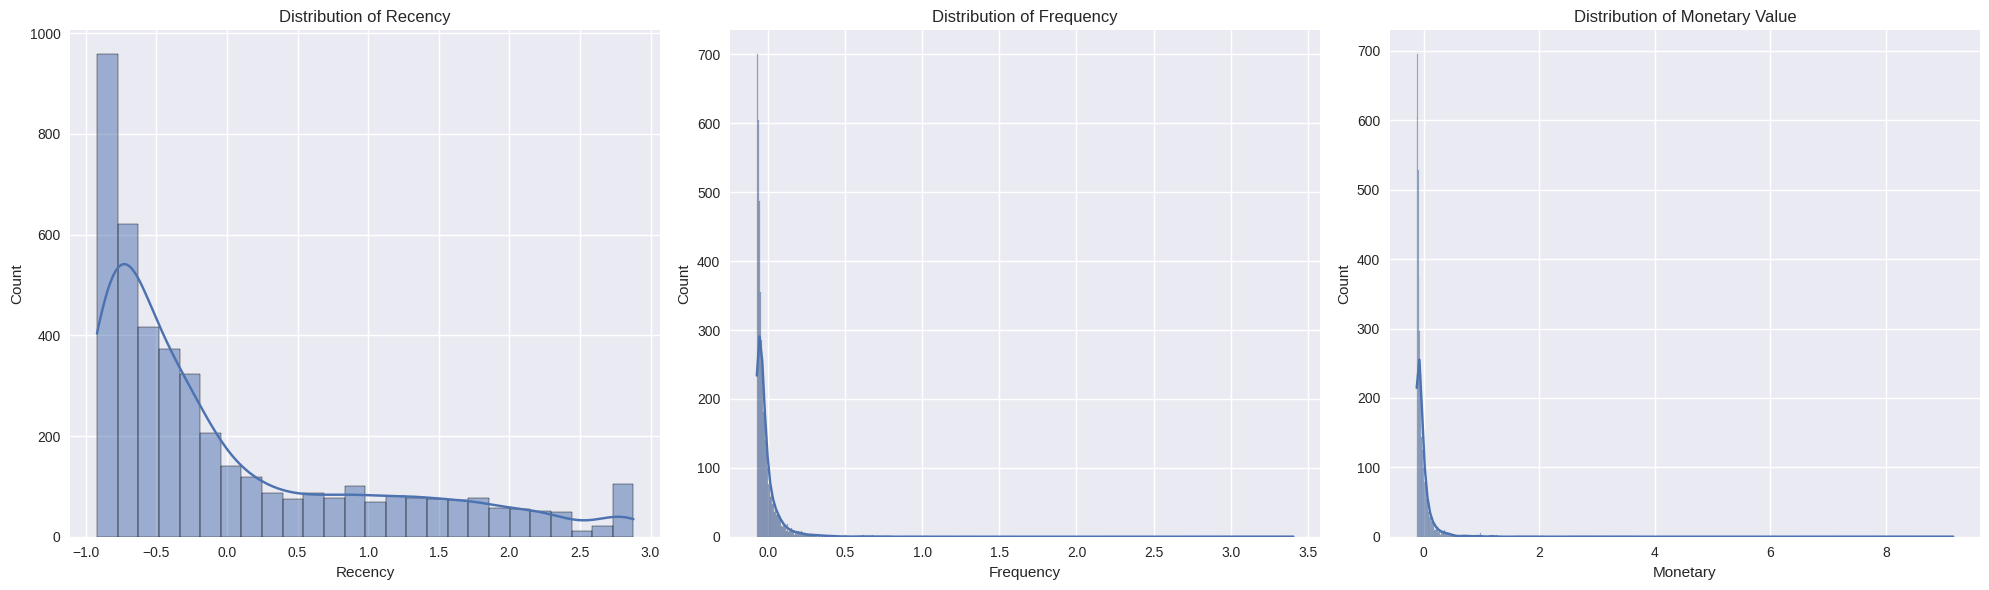

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
sns.histplot(data=rfm_df, x='Recency', kde=True, ax=axes[0])
sns.histplot(data=rfm_df, x='Frequency', kde=True, ax=axes[1])
sns.histplot(data=rfm_df, x='Monetary', kde=True, ax=axes[2])
axes[0].set_title('Distribution of Recency')
axes[1].set_title('Distribution of Frequency')
axes[2].set_title('Distribution of Monetary Value')
plt.tight_layout()
plt.show()


,Customer ID,Recency,Frequency,Monetary,AOV,Days_Since_First_Purchase,Purchase_Regularity,Cat_10002,Cat_10133,Cat_10134,...,Cat_90200A,Cat_ADJUST,Cat_BANK CHARGES,Cat_C2,Cat_D,Cat_DOT,Cat_M,Cat_PADS,Cat_POST,Cat_TEST001
0,-1.0,-0.920652,65.686455,63.791882,-0.667419,1.215828,-0.737660,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,12346.0,-0.248305,-0.045003,-0.082857,-0.486195,1.107090,0.760341,False,False,False,...,False,False,False,False,False,False,True,False,False,False
2,12347.0,-0.900278,-0.029770,-0.025123,0.005317,-1.577913,-0.447426,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,12348.0,-0.176996,-0.060845,-0.103096,-0.472947,-1.293521,-0.740960,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,12349.0,-0.492795,-0.007835,0.030661,0.074806,1.190735,0.665014,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4379,18283.0,-0.747472,0.067111,-0.073494,-1.028895,0.546669,0.022622,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4380,18284.0,-0.268679,-0.055361,-0.091608,-0.338291,-1.352072,-0.716147,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4381,18285.0,2.084535,-0.065719,-0.102141,0.092354,0.563398,-0.740960,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4382,18286.0,0.210113,-0.030379,-0.026371,0.006327,1.090361,0.835340,False,False,False,...,False,False,False,False,False,False,False,False,False,False


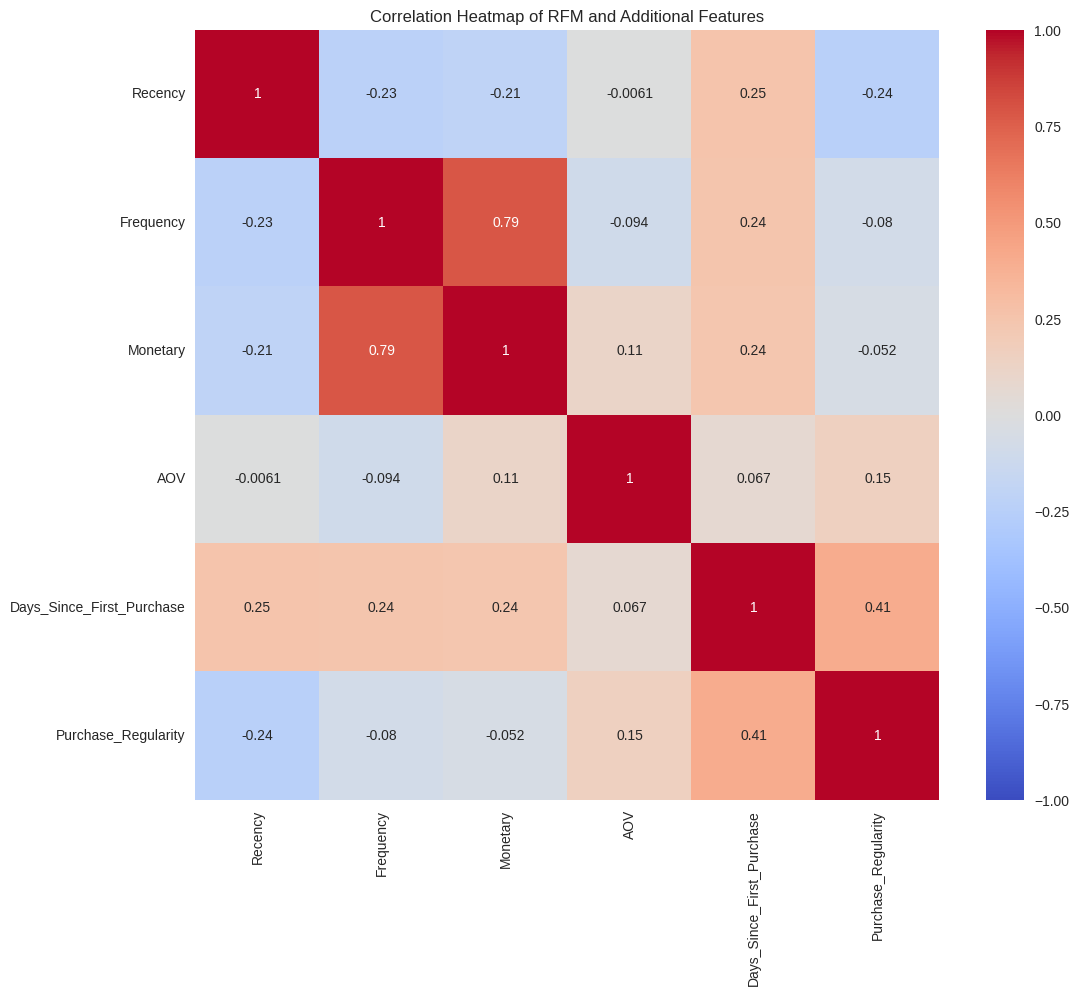

In [ ]:
corr_matrix = rfm_df[['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Correlation Heatmap of RFM and Additional Features')
plt.show()


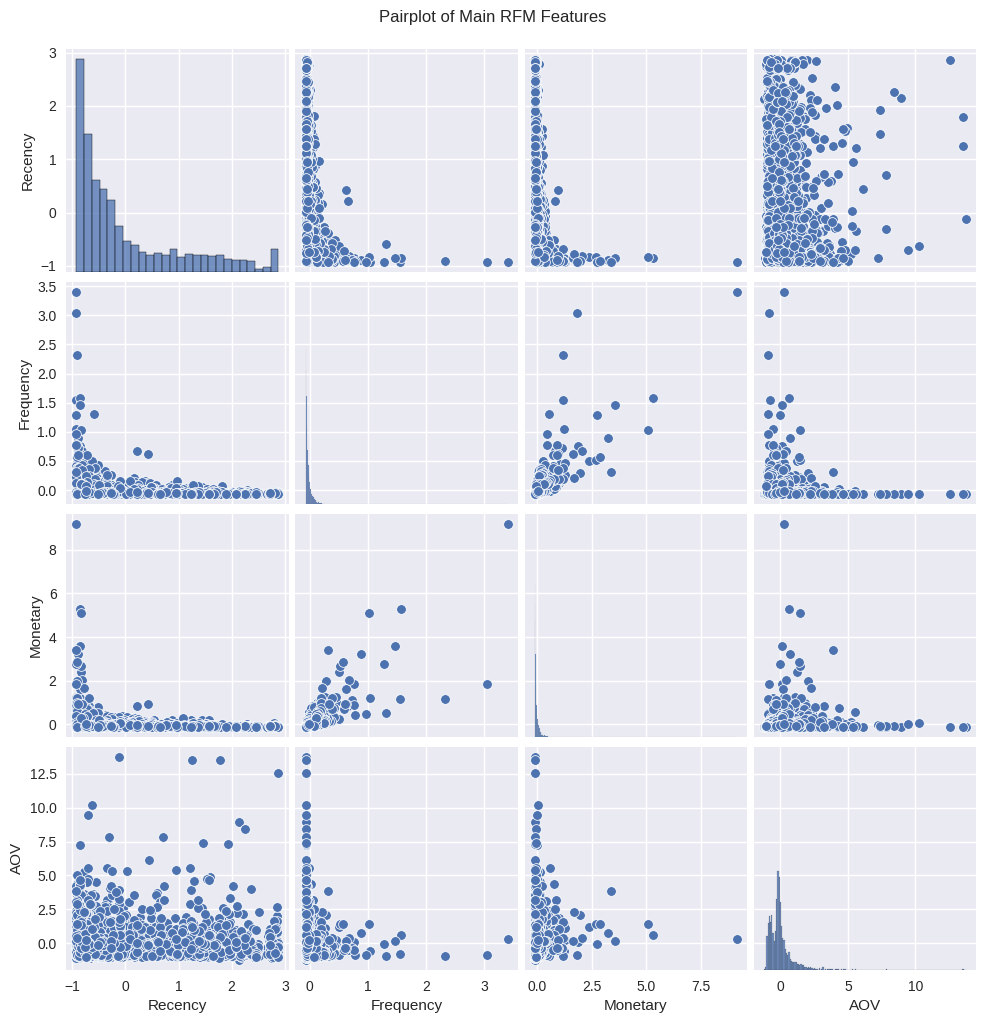

In [ ]:
sns.pairplot(rfm_df[['Recency', 'Frequency', 'Monetary', 'AOV']])
plt.suptitle('Pairplot of Main RFM Features', y=1.02)
plt.show()

In [ ]:
#3. K-means Clustering

In [ ]:
def optimal_k(data, max_k):
    iters = range(2, max_k+1, 1)
    sse = []
    silhouette_scores = []

    for k in iters:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        sse.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(data, kmeans.labels_))

    return iters, sse, silhouette_scores

In [ ]:
features = ['Recency', 'Frequency', 'Monetary']
iters, sse, silhouette_scores = optimal_k(rfm_df[features], 10)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

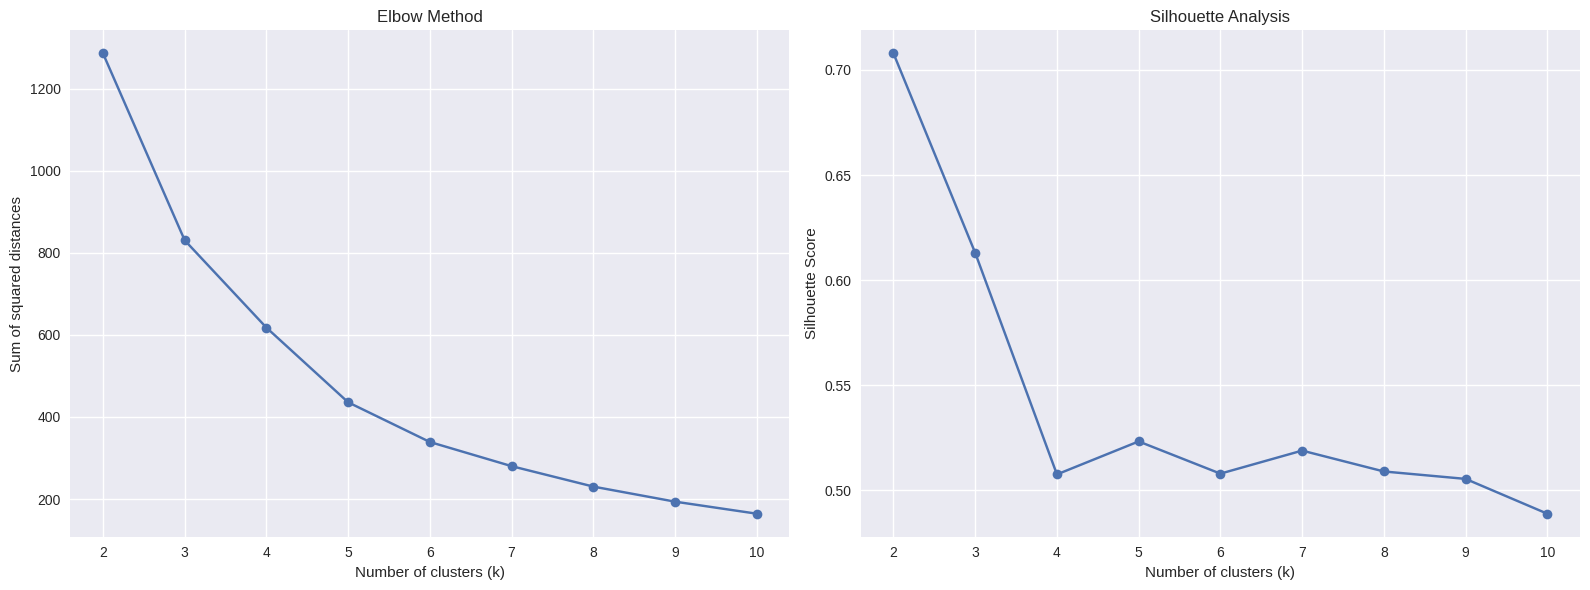

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
ax1.plot(iters, sse, marker='o')
ax1.set_xlabel('Number of clusters (k)')
ax1.set_ylabel('Sum of squared distances')
ax1.set_title('Elbow Method')

ax2.plot(iters, silhouette_scores, marker='o')
ax2.set_xlabel('Number of clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.set_title('Silhouette Analysis')

plt.tight_layout()
plt.show()


In [ ]:
#3.2 Perform K-means Clustering
# Based on the elbow method and silhouette analysis, choose the optimal k
optimal_k = 5  # This should be determined from the plots above

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
rfm_df['Cluster'] = kmeans.fit_predict(rfm_df[features])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
fig = px.scatter_3d(rfm_df, x='Recency', y='Frequency', z='Monetary', color='Cluster',
                    labels={'Cluster': 'Cluster'},
                    title='3D Scatter Plot of RFM Clusters')
fig.show()


In [ ]:
fig = px.parallel_coordinates(rfm_df, color="Cluster",
                              dimensions=['Recency', 'Frequency', 'Monetary', 'AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity'],
                              color_continuous_scale=px.colors.diverging.Tealrose,
                              title='Parallel Coordinates Plot of Customer Segments')
fig.show()

In [ ]:
centroids = rfm_df.groupby('Cluster')[features].mean()
print("Cluster Centroids:")
print(centroids)

# Radar Chart of Cluster Centroids
fig = go.Figure()

for i in range(optimal_k):
    fig.add_trace(go.Scatterpolar(
        r=centroids.iloc[i].values,
        theta=features,
        fill='toself',
        name=f'Cluster {i}'
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 1])),
    showlegend=True,
    title='Radar Chart of Cluster Centroids'
)

fig.show()

Cluster Centroids:
          Recency  Frequency  Monetary
Cluster                               
0       -0.132989  -0.034381 -0.050711
1        2.209042  -0.060050 -0.099626
2        1.000933  -0.050792 -0.080795
3       -0.732953   0.007915  0.021373
4       -0.878546   1.242272  3.288804


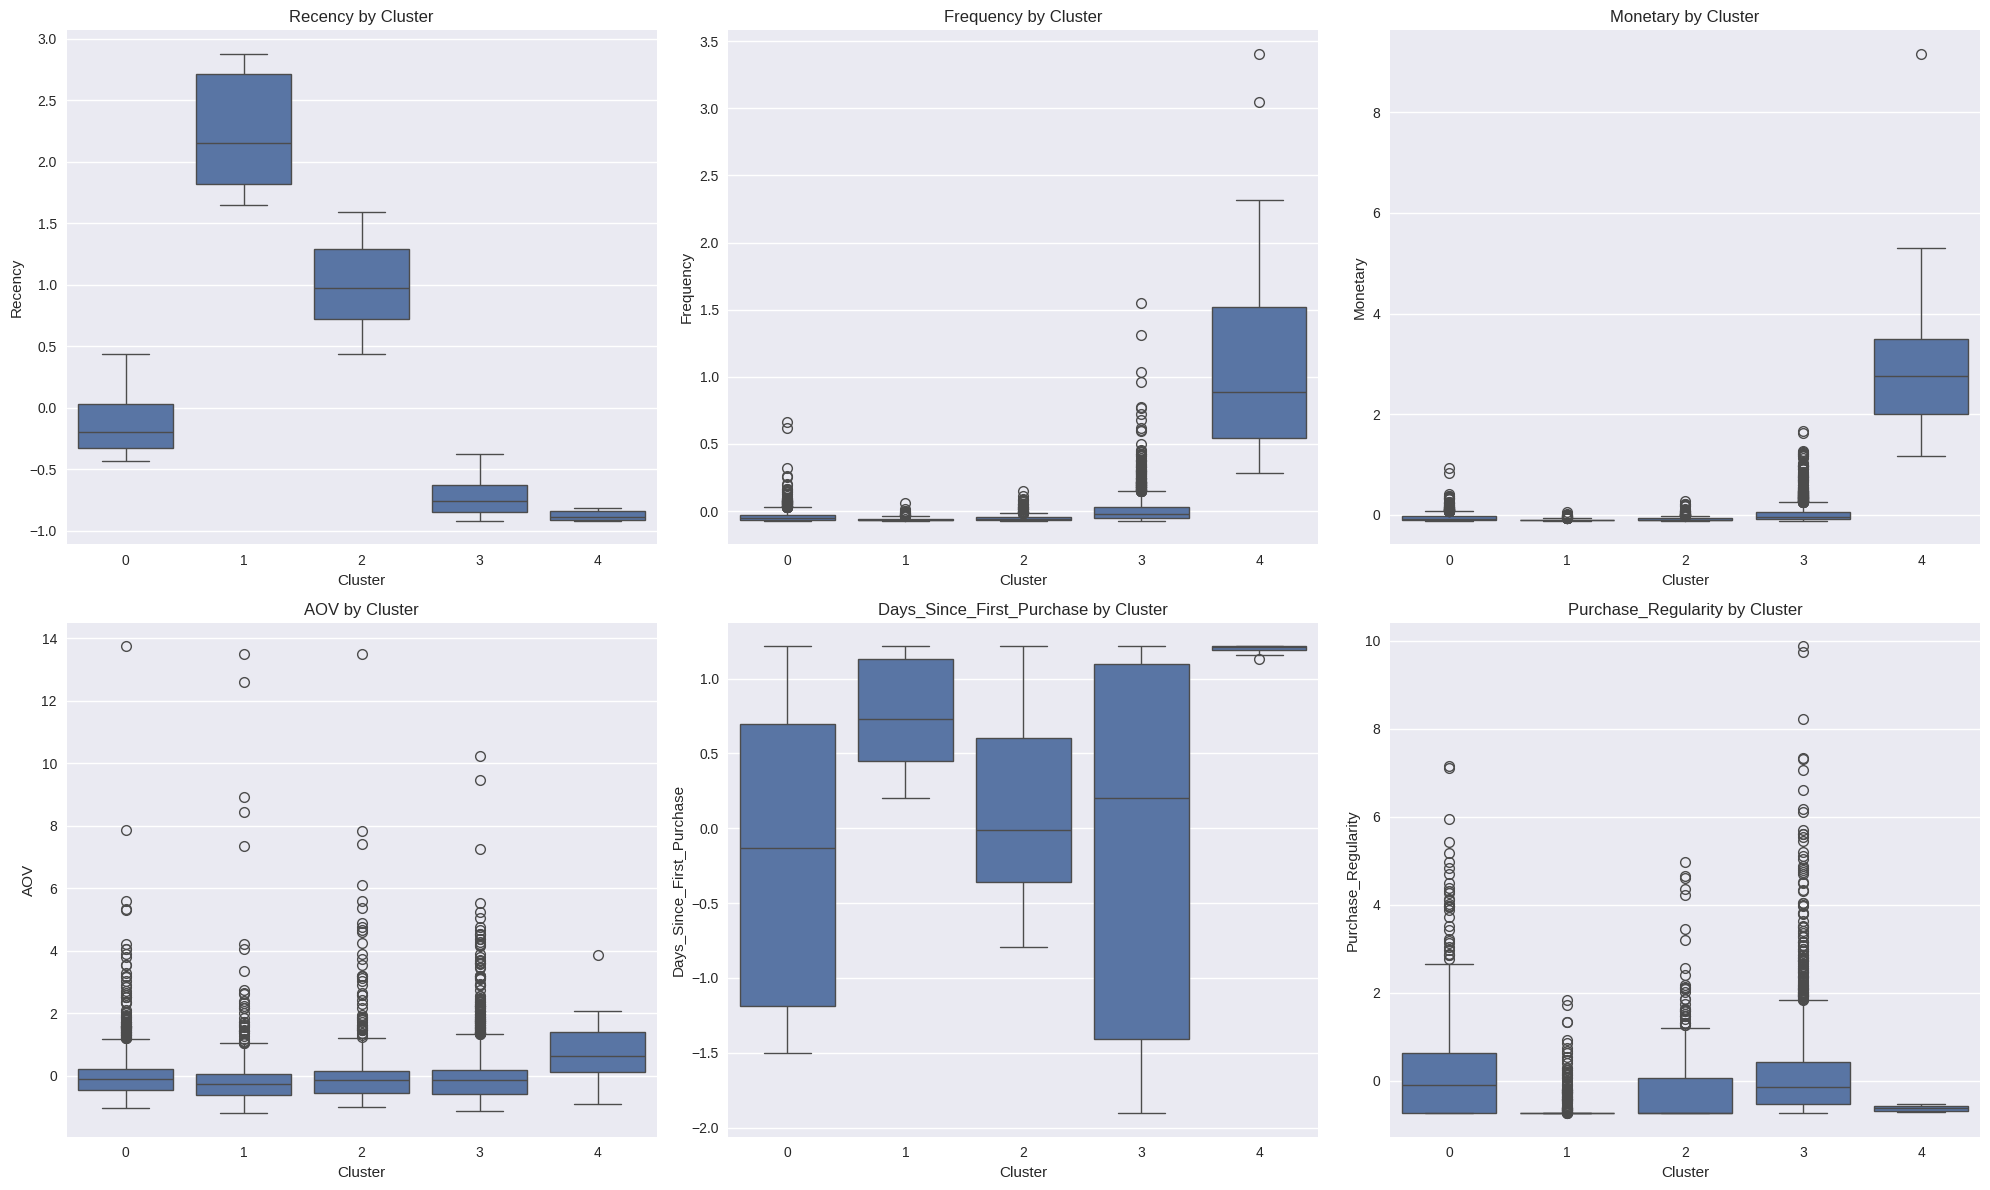

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
axes = axes.flatten()

for i, feature in enumerate(features + ['AOV', 'Days_Since_First_Purchase', 'Purchase_Regularity']):
    sns.boxplot(x='Cluster', y=feature, data=rfm_df, ax=axes[i])
    axes[i].set_title(f'{feature} by Cluster')

plt.tight_layout()
plt.show()

In [ ]:
def interpret_cluster(cluster_data):
    recency = cluster_data['Recency'].mean()
    frequency = cluster_data['Frequency'].mean()
    monetary = cluster_data['Monetary'].mean()

    if recency <= 30 and frequency > 10 and monetary > 1000:
        return "High-Value Active Customers"
    elif recency <= 30 and frequency <= 10 and monetary <= 1000:
        return "Low-Value Active Customers"
    elif 30 < recency <= 90 and frequency > 5:
        return "Potential Churners"
    elif recency > 90 and frequency <= 5:
        return "Lost Customers"
    else:
        return "Average Customers"

cluster_interpretations = {}
for cluster in range(optimal_k):
    cluster_data = rfm_df[rfm_df['Cluster'] == cluster]
    interpretation = interpret_cluster(cluster_data)
    cluster_interpretations[cluster] = interpretation
    print(f"Cluster {cluster}: {interpretation}")
    print(cluster_data[features + ['AOV']].mean())
    print()

Cluster 0: Low-Value Active Customers
Recency     -0.132989
Frequency   -0.034381
Monetary    -0.050711
AOV          0.025628
dtype: float64

Cluster 1: Low-Value Active Customers
Recency      2.209042
Frequency   -0.060050
Monetary    -0.099626
AOV         -0.047830
dtype: float64

Cluster 2: Low-Value Active Customers
Recency      1.000933
Frequency   -0.050792
Monetary    -0.080795
AOV          0.031885
dtype: float64

Cluster 3: Low-Value Active Customers
Recency     -0.732953
Frequency    0.007915
Monetary     0.021373
AOV         -0.018209
dtype: float64

Cluster 4: Low-Value Active Customers
Recency     -0.878546
Frequency    1.242272
Monetary     3.288804
AOV          0.794423
dtype: float64



In [ ]:
# Simple CLV calculation (you may want to use a more sophisticated model)
rfm_df['CLV'] = rfm_df['Monetary'] * (rfm_df['Frequency'] / rfm_df['Recency'])

fig = px.box(rfm_df, x='Cluster', y='CLV', color='Cluster',
             title='Customer Lifetime Value by Cluster')
fig.show()

In [ ]:
rfm_df['CohortMonth'] = pd.to_datetime(rfm_df['FirstPurchaseDate']).dt.to_period('M')

# Check for NaT values
print("NaT values in 'FirstPurchaseDate':", rfm_df['FirstPurchaseDate'].isnull().sum())

# Group by 'CohortMonth' and calculate mean CLV
cohort_data = rfm_df.groupby('CohortMonth')['CLV'].mean().reset_index()

# Check the cohort_data
print("Cohort Data:")
print(cohort_data)

# Create the line chart
fig = px.line(cohort_data, x='CohortMonth', y='CLV',
              title='Average Customer Lifetime Value by Cohort')
fig.show()


KeyError: 'FirstPurchaseDate'

In [ ]:
df.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country', 'Return', 'adjusted_quantity',
       'Net_sales', 'Missing_Customer_ID'],
      dtype='object')

In [ ]:
def rfm_level(df):
    return df.apply(lambda x:
                    'High' if x >= df.quantile(0.75) else
                    'Low' if x <= df.quantile(0.25) else
                    'Medium')

rfm_segment = rfm_df[['Recency', 'Frequency', 'Monetary']].apply(rfm_level)
rfm_segment['RFM_Score'] = rfm_segment.apply(lambda x: str(x['Recency']) + '-' + str(x['Frequency']) + '-' + str(x['Monetary']), axis=1)

segment_counts = rfm_segment['RFM_Score'].value_counts()

fig = px.treemap(names=segment_counts.index, parents=['RFM Segments']*len(segment_counts),
                 values=segment_counts.values,
                 title='RFM Segment Distribution')
fig.show()

KeyError: 'PurchaseDate'

In [ ]:
"""
## 10. Recommendations for Marketing Strategies

Based on our analysis, here are some targeted marketing strategies for each customer segment:

1. High-Value Active Customers:
    - Implement a loyalty program with exclusive benefits
    - Offer early access to new products or services
    - Provide personalized product recommendations based on past purchases
2. Low-Value Active Customers:
    - Upsell and cross-sell campaigns to increase their purchase value
    - Offer bundle deals to encourage larger purchases
    - Provide incentives for referrals to acquire similar customers
3. Potential Churners:
    - Re-engagement email campaigns with special offers
    - Conduct surveys to understand their changing needs or pain points
    - Offer a "We Miss You" discount on their next purchase
4. Lost Customers:
    - Develop a win-back campaign with a substantial one-time offer
    - Showcase new products or improvements since their last purchase
    - Consider a multi-touch approach using email, direct mail, and retargeting ads
5. Average Customers:
    - Segment further based on purchase categories or behavior
    - Implement a tiered loyalty program to encourage increased engagement
    - Provide educational content about products to increase engagement and purchase frequency

Remember to continuously monitor the performance of these strategies and refine them based on customer responses and changing behaviors.

This comprehensive analysis provides deep insights into your customer base, allowing for data-driven decision-making in marketing and customer relationship management. The visualizations and interpretations offer a clear understanding of different customer segments and their characteristics.

As next steps, consider:

1. Implementing A/B testing for the proposed marketing strategies
2. Developing a dashboard for real-time monitoring of customer segments
3. Integrating this analysis with other data sources (e.g., website behavior, customer service interactions) for a more holistic view of customer behavior

Would you like me to elaborate on any specific part of this analysis or provide more details on implementing these insights?
"""